In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from copy import deepcopy
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import time
import gc
import scipy
from scipy.signal import butter, filtfilt, argrelextrema
from scipy.interpolate import interp1d
from mup import MuReadout, MuSGD, MuAdam
import mup as mup
from pathlib import Path
import nbimporter
import post_processing_lib as pp

In [2]:
# improve the ploting style
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 22
rcParams['mathtext.fontset'] = 'stix'

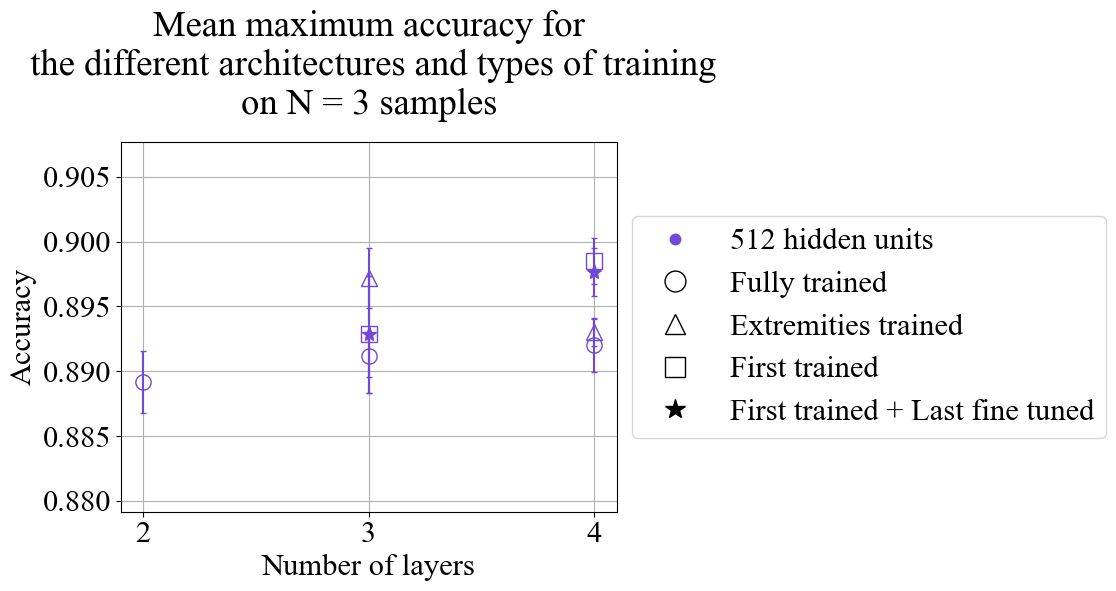

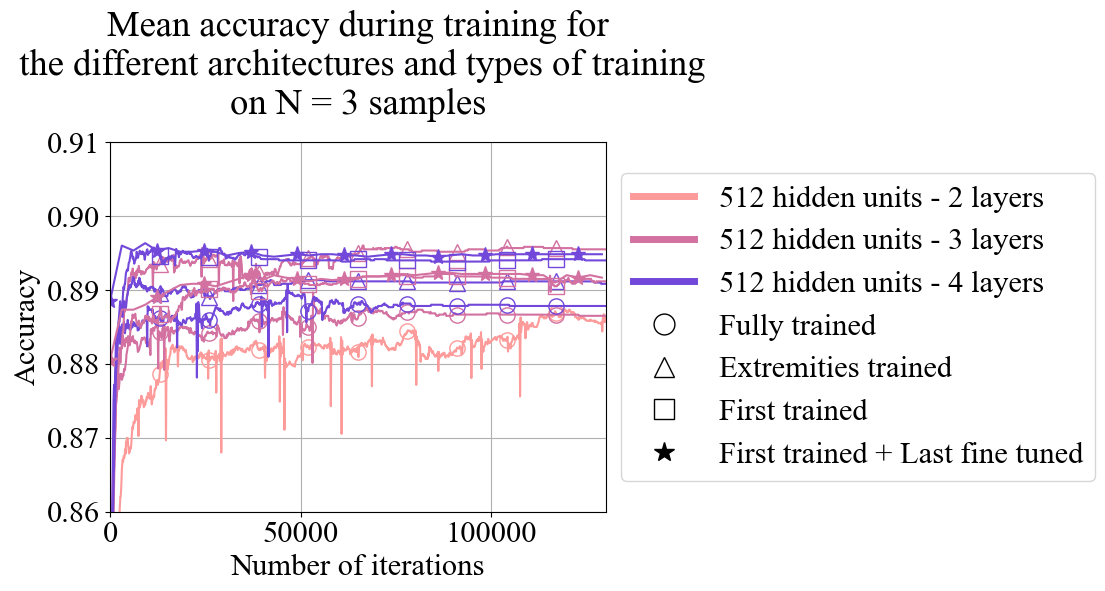

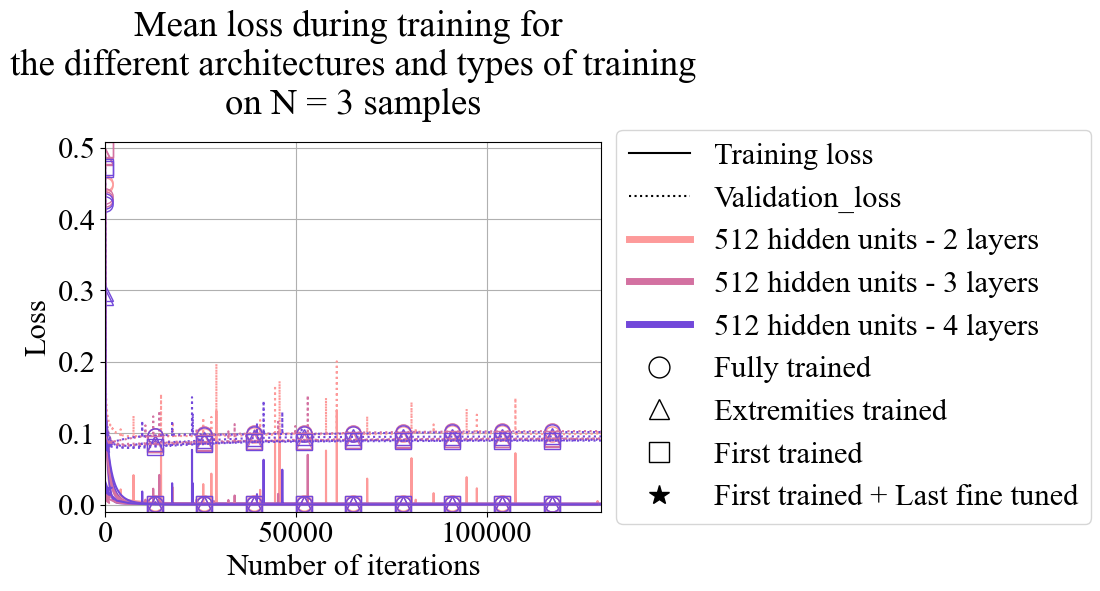

In [8]:
##### 08/07 - Statistical plots on CIFAR-10 : car-plane #####

date = '07_07_25'

dataset = 'c-p'

save_path = 'Post-processing/07_07_25/'
save_path_convergence_speed = save_path + 'Convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_normalized_convergence_speed = save_path + 'Normalized convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_max_accuracy = save_path + 'Maximum accuracy/Dataset_' + dataset + '_statistical_results/'
save_path_accuracy_trajectory = save_path + 'Accuracy trajectory/Dataset_' + dataset + '_statistical_results/'
save_path_loss_trajectory = save_path + 'Loss trajectory/Dataset_' + dataset + '_statistical_results/'

os.makedirs(save_path_convergence_speed, exist_ok=True)
os.makedirs(save_path_normalized_convergence_speed, exist_ok=True)
os.makedirs(save_path_max_accuracy, exist_ok=True)
os.makedirs(save_path_accuracy_trajectory, exist_ok=True)
os.makedirs(save_path_loss_trajectory, exist_ok=True)


# Plot the performances


model_ref_1_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.1+1)_" + dataset, date)
model_1_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.2+1)_" + dataset, date)
model_2_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.3+1)_" + dataset, date)
model_3_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.1+1)_" + dataset, date)
model_4_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.2+1)_" + dataset, date)
model_5_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.1-1)_" + dataset, date)
model_6_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.2-1)_" + dataset, date)



model_ref_1 = pp.convert_to_statistical_data_dictionnary(model_ref_1_multi_save)
model_1 = pp.convert_to_statistical_data_dictionnary(model_1_multi_save)
model_2 = pp.convert_to_statistical_data_dictionnary(model_2_multi_save)
model_3 = pp.convert_to_statistical_data_dictionnary(model_3_multi_save)
model_4 = pp.convert_to_statistical_data_dictionnary(model_4_multi_save)
model_5 = pp.convert_to_statistical_data_dictionnary(model_5_multi_save)
model_6 = pp.convert_to_statistical_data_dictionnary(model_6_multi_save)



curve_dictionnary_512hu_multi_save = {'512 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_1_multi_save, '3 layers' : model_1_multi_save, '4 layers' : model_2_multi_save},
                        'Extremities trained': {'3 layers' : model_3_multi_save, '4 layers' : model_4_multi_save},
                        'First trained': {'3 layers' : model_5_multi_save, '4 layers' : model_6_multi_save},
                        'First trained + Last fine tuned' : {'3 layers' : model_5_multi_save, '4 layers' : model_6_multi_save}
                         }}

curve_dictionnary_512hu= {'512 hidden units' : 
                        { 'Fully trained' : {'2 layers' : model_ref_1, '3 layers' : model_1, '4 layers' : model_2},
                        'Extremities trained': {'3 layers' : model_3, '4 layers' : model_4},
                        'First trained': {'3 layers' : model_5, '4 layers' : model_6},
                        'First trained + Last fine tuned' : {'3 layers' : model_5, '4 layers' : model_6}
                         }}


# # curve_dictionnary_2048hu = {'2048 hidden units' : 
# #                         {'Reference' : {'2 layers' : model_ref_2}, 
# #                          'Fully trained' : {'3 layers' : model_6, '4 layers' : model_7},
# #                          'Extremities trained': {'3 layers' : model_8, '4 layers' : model_9},
# #                          'First trained': {'3 layers' : model_10},
# #                          'First trained + Last fine tuned' : {'3 layers' : model_10}
# #                          }}

# # curve_dictionnary_8192hu = {'8192 hidden units' : 
# #                         {'Reference' : {'2 layers' : model_ref_3}, 
# #                         'Fully trained' : {'3 layers' : model_11, '4 layers' : model_12},
# #                         'Extremities trained': {'3 layers' : model_13, '4 layers' : model_14},
# #                         'First trained': {'3 layers' : model_15},
# #                         'First trained + Last fine tuned' : {'3 layers' : model_15}
#                         #}}





# curve_dictionnary = curve_dictionnary_512hu #| curve_dictionnary_2048hu | curve_dictionnary_8192hu

# # curve_dictionnary_8192hu_extremities = {'8192 hidden units' : 
# #                         {'Reference' : {'2 layers' : model_ref_1}, 
# #                          'Extremities trained': {'3 layers' : model_3, '4 layers' : model_4}
# #                          }}

# # curve_dictionnary_2048hu_extremities = {'2048 hidden units' : 
# #                         {'Reference' : {'2 layers' : model_ref_2},
# #                          'Extremities trained': {'3 layers' : model_7, '4 layers' : model_8}
# #                          }}

# # curve_dictionnary_512hu_extremities = {'512 hidden units' : 
# #                         {'Reference' : {'2 layers' : model_ref_3}, 
# #                          'Extremities trained': {'3 layers' : model_11, '4 layers' : model_12}
# #                          }}

# # curve_dictionnary_extremities = curve_dictionnary_8192hu_extremities #| curve_dictionnary_2048hu_extremities | curve_dictionnary_512hu_extremities

line_color_list = {'8192 hidden units' : {'2 layers' : 'gold', '3 layers' : 'orange', '4 layers' : 'red'},
                   '2048 hidden units' : {'2 layers' : 'olive', '3 layers' : 'cyan', '4 layers' : 'blue'}, 
                   '512 hidden units' : {'2 layers' : 'pink', '3 layers' : 'magenta', '4 layers' : 'purple'}}

color_list_1 = {'8192 hidden units' : '#e73434', 
              '2048 hidden units' : '#38761d', 
              '512 hidden units' : "#7148daff"
              }

color_list_2 = {'8192 hidden units' : {'2 layers' : "#fac62b", '3 layers' : "#eb9233", '4 layers' : "#e73434"},
                   '2048 hidden units' : {'2 layers' : "#76b947", '3 layers' : '#38761d', '4 layers' : "#3988ff"}, 
                   '512 hidden units' : {'2 layers' : "#fd9a9a", '3 layers' : "#d371a1", '4 layers' : "#7248da"}}


marker_list = {'Reference' : 'D', 'Fully trained' : 'o', 'Extremities trained' : '^', 'First trained' : 's', 'First trained + Last fine tuned' : '*'}

y_lim = [0.87, 0.90]

x_lim_2 = [0, 30e3]
y_lim_2 = [0.72, 0.81]

x_lim_3 = [0, 15e3]
y_lim_3 = [0.72, 0.81]


pp.statistical_max_accuracy_plot(curve_dictionnary_512hu_multi_save, color_list_1, marker_list,  save_file = True, save_path = save_path_max_accuracy)

pp.statistical_accuracy_trajectory_plot(curve_dictionnary_512hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, y_lim=y_lim, save = True, save_path = save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')

pp.statistical_loss_trajectory_plot(curve_dictionnary_512hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, save = True, save_path = save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')

  